## Analysing of Energy Performance of Office Buildings in UK

The data chosen displays the relative energy performance of UK central government buildings for the selected period.

The data driving this is taken from building utility meters, half-hourly.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
import datetime

sns.set_style('whitegrid')

March_Data = pd.read_excel(r'/Users/erikangravina/Documents/GitHub/Covid19-Environmental-and-Economic-Analysis/data/HomeOfficeGeneration.xlsx', sheet_name = 'March')
April_Data = pd.read_excel(r'/Users/erikangravina/Documents/GitHub/Covid19-Environmental-and-Economic-Analysis/data/HomeOfficeGeneration.xlsx', sheet_name = 'April')
May_Data = pd.read_excel(r'/Users/erikangravina/Documents/GitHub/Covid19-Environmental-and-Economic-Analysis/data/HomeOfficeGeneration.xlsx', sheet_name = 'May')

- - - - - -
### 1. Focus on the Home Office Headquarters' Energy Generation with comparison across 2019-2020 Data;

#### In 'normal times' what is the average energy produced in any one day across a month?

Starting off with visualisation of one sample day (here 1st of March 2019) with associated CO2 emissions.

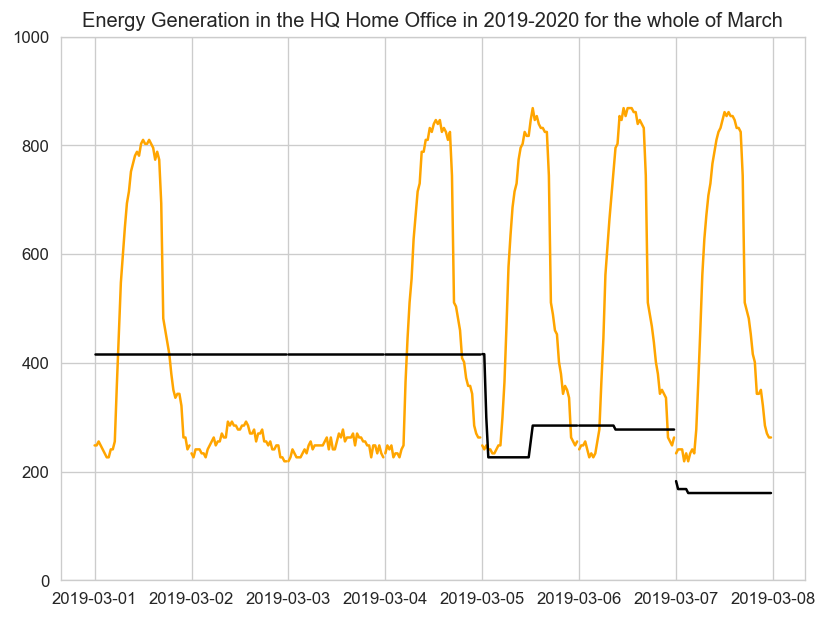

In [32]:
Time = March_Data[1:2].to_numpy()[0][5:]
Date = HQ_Electr_March_2019[:,4]
labels = March_Data[1:2].values.tolist()

# Clean up March 2019 Data

March_19_Data = March_Data[20:]
March_19_Data.columns = labels
HQ_Electr_March_2019 = March_19_Data[31:].to_numpy()

# Clean up March 2020 Data

March_20_Data = March_Data[:20]
March_20_Data.columns = labels
HQ_Electr_March_2020 = March_20_Data[2:10].to_numpy()

def plot_generation_of_any_chosen_date_march(day_chosen, year_chosen):
    """
    :param day_chosen: this is an integer n = 1, 2 ... 31 to stand for the day of the month.
    :param year_chosen: this is an integer 2019 or 2020 to give the choice to call upon any one of those datasets.
    :return: plot
    """

    # Necessary Handling of datetime.datetime format
    x = March_Data[1:2].values[0][5:].tolist()
    x_dt = [datetime.datetime.combine(Date[day_chosen], t) for t in x]
    x = md.DateFormatter('%Y-%m-%d')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(x)
    
    if year_chosen == 2019:
        plt.plot(x_dt, HQ_Electr_March_2019[day_chosen,5:], color = 'orange')
    elif year_chosen == 2020:
        plt.plot(x_dt, HQ_Electr_March_2020[day_chosen,5:], color = 'black')
    else:
        print("Oops - year not valid: it's either 2019 or 2020")

    return

Fig1 = plt.figure(figsize=(8, 6), dpi=120,)
for i in range(7):
    plot_generation_of_any_chosen_date_march(i, 2019)
for i in range(7):
    plot_generation_of_any_chosen_date_march(i, 2020)
plt.title("Energy Generation in the HQ Home Office in 2019-2020 for first week of March")
plt.ylim(0,1000)
plt.show()

#### Comparison Plot for a Sample Day before and after 
In terms of GHG how much CO2 was produced during a 'normal' month?
Carbon Factors and Cost
Fuel	kgCO2e per unit
Electricity (kWh)	0.537

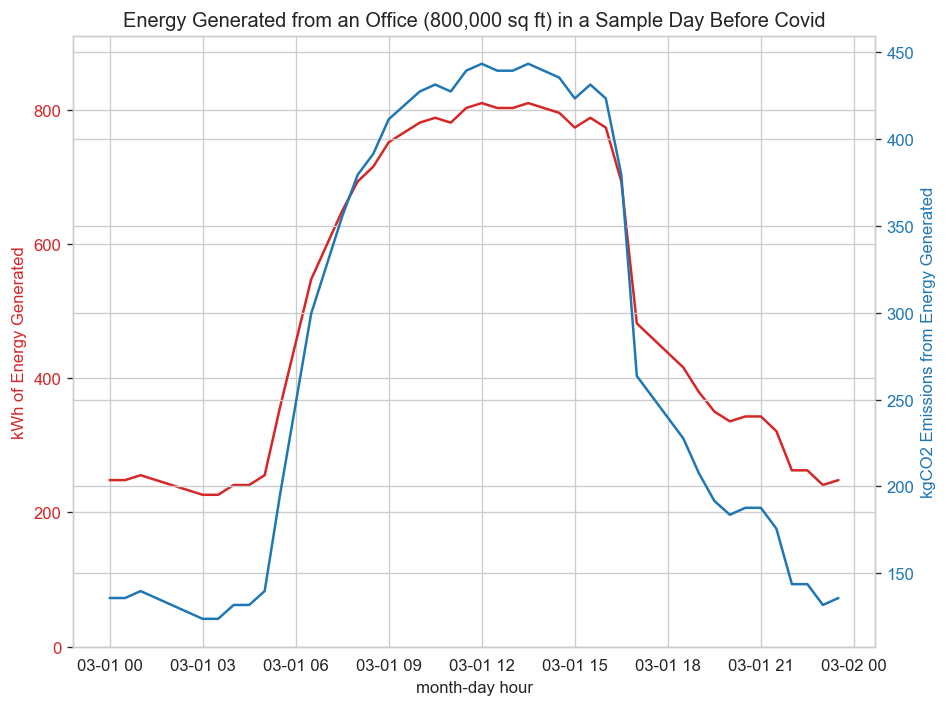

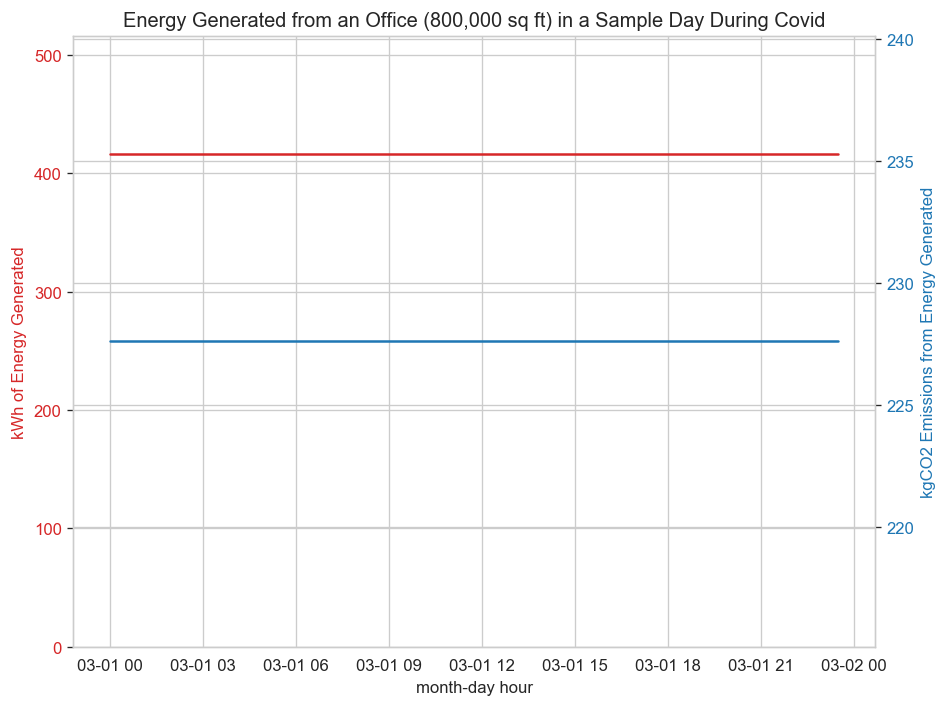

In [33]:
def comparison_plot_with_emissions_of_any_chosen_date_march(day_chosen, year_chosen):
    """
    :param day_chosen: this is an integer n = 1, 2 ... 31 to stand for the day of the month.
    :param year_chosen: this is an integer 2019 or 2020 to give the choice to call upon any one of those datasets.
    :return: plot
    """
    
    x = March_Data[1:2].values[0][5:].tolist()
    x_dt = [datetime.datetime.combine(Date[day_chosen], t) for t in x]

    fig, ax1 = plt.subplots(figsize=(8, 6), dpi=120,)
    if year_chosen == 2020: 
        ax1.set(title = "Energy Generated from an Office (800,000 sq ft) in a Sample Day During Covid", ylim = [0, max(HQ_Electr_March_2020[0,5:]) + 100])
    elif year_chosen == 2019:
        ax1.set(title = "Energy Generated from an Office (800,000 sq ft) in a Sample Day Before Covid", ylim = [0, max(HQ_Electr_March_2019[0,5:]) + 100])
 
    color = 'tab:red'
    ax1.set_xlabel('month-day hour')
    ax1.set_ylabel('kWh of Energy Generated', color=color)
    if year_chosen == 2020:
        ax1.plot(x_dt, HQ_Electr_March_2020[day_chosen,5:], color=color)
    elif year_chosen == 2019:
        ax1.plot(x_dt, HQ_Electr_March_2019[day_chosen,5:], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('kgCO2 Emissions from Energy Generated', color = color)  # we already handled the x-label with ax1
    if year_chosen == 2020:
        ax2.plot(x_dt, 0.547*HQ_Electr_March_2020[day_chosen,5:], color= color)
    elif year_chosen == 2019:
        ax2.plot(x_dt, 0.547*HQ_Electr_March_2019[day_chosen,5:], color= color)
    # ax2.fill_between(x = x_dt, y1 = 0.547*HQ_Electr_March_2019[0,5:], color = color, alpha = 0.30)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

    return

# Before Covid - 2019 Data

comparison_plot_with_emissions_of_any_chosen_date_march(0, 2019)

# After Covid - 2019 Data

comparison_plot_with_emissions_of_any_chosen_date_march(0, 2020)


- - - - - - 
2. Performance is shown per square metre or per occupant depending on which 'Analyse By' button is selected.

The site contains 800,000 sq ft (74,000 m2) of office space.

NOTE:
The most commonly accepted rule in London is that 100 sq.ft. per employee is the ideal amount of space per person. This allows for roughly 50 sq ft for desk space and another 50 sq ft to accommodate room in communal areas, like breakout spaces, meeting rooms and kitchens.
Hence capacity should be roughly 8,000 employees.
